In [443]:
import numpy as np
from matplotlib import pyplot as plt

In [444]:
def area(x1,y1,x2,y2,x3,y3):
    return abs((x1 * (y2-y3) + x2 * (y3-y1) + x3 * (y1-y2)) / 2.0)

In [445]:
def isInside(x1,y1,x2,y2,x3,y3,x,y):
    err = 1e-6
    A = area (x1, y1, x2, y2, x3, y3) # Total Area
    A1 = area (x, y, x2, y2, x3, y3)
    A2 = area (x1, y1, x, y, x3, y3)
    A3 = area (x1, y1, x2, y2, x, y)
    tmp = A1 + A2 + A3
    # tmp2 = tmp==A
    if ((A-err)<=tmp<=(A+err)):
        return True
    else:
        return False

In [446]:
def get_acute_angles(x1, y1, x2, y2, x3, y3):
    H = ((x3-x1)**2 + (y2-y1)**2)**(1/2)
    theta_123 = np.arcsin((x3-x1)/H)
    theta_132 = np.arcsin((y2-y1)/H)
    
    return theta_123, theta_132

In [447]:
# Function that measures the new coordinates
# By deducting delta_x and delta_y from the original ones

def get_deltas(step, x1, y1, x2, y2, x3, y3):
    theta_123, theta_132 = get_acute_angles(x1, y1, x2, y2, x3, y3)
    
    delta_x = step / np.tan(theta_132/2)
    delta_y = step / np.tan(theta_123/2)
    
    return delta_x, delta_y

In [448]:
x_max = 100  # Point (x_max, 0.0)
y_max = 100  # Point (0.0, y_max)a
step = 2.5
store = []

delta_x, delta_y = get_deltas(step, 0, 0, 0, y_max, x_max, 0)

for a in np.arange(0+step, x_max+step-delta_x, step):
    for b in np.arange(0+step, y_max+step-delta_y, step):
        if isInside(step, step, step,y_max-delta_y, x_max-delta_x,step, a,b):
            store.append([a,b])


store.append([step, y_max-delta_y])
store.append([x_max-delta_x, step])

In [449]:
print(store)

[[2.5, 2.5], [2.5, 5.0], [2.5, 7.5], [2.5, 10.0], [2.5, 12.5], [2.5, 15.0], [2.5, 17.5], [2.5, 20.0], [2.5, 22.5], [2.5, 25.0], [2.5, 27.5], [2.5, 30.0], [2.5, 32.5], [2.5, 35.0], [2.5, 37.5], [2.5, 40.0], [2.5, 42.5], [2.5, 45.0], [2.5, 47.5], [2.5, 50.0], [2.5, 52.5], [2.5, 55.0], [2.5, 57.5], [2.5, 60.0], [2.5, 62.5], [2.5, 65.0], [2.5, 67.5], [2.5, 70.0], [2.5, 72.5], [2.5, 75.0], [2.5, 77.5], [2.5, 80.0], [2.5, 82.5], [2.5, 85.0], [2.5, 87.5], [2.5, 90.0], [2.5, 92.5], [5.0, 2.5], [5.0, 5.0], [5.0, 7.5], [5.0, 10.0], [5.0, 12.5], [5.0, 15.0], [5.0, 17.5], [5.0, 20.0], [5.0, 22.5], [5.0, 25.0], [5.0, 27.5], [5.0, 30.0], [5.0, 32.5], [5.0, 35.0], [5.0, 37.5], [5.0, 40.0], [5.0, 42.5], [5.0, 45.0], [5.0, 47.5], [5.0, 50.0], [5.0, 52.5], [5.0, 55.0], [5.0, 57.5], [5.0, 60.0], [5.0, 62.5], [5.0, 65.0], [5.0, 67.5], [5.0, 70.0], [5.0, 72.5], [5.0, 75.0], [5.0, 77.5], [5.0, 80.0], [5.0, 82.5], [5.0, 85.0], [5.0, 87.5], [5.0, 90.0], [7.5, 2.5], [7.5, 5.0], [7.5, 7.5], [7.5, 10.0], [7.5, 1

In [450]:
store = np.array(store)

In [451]:
print(len(store))

705


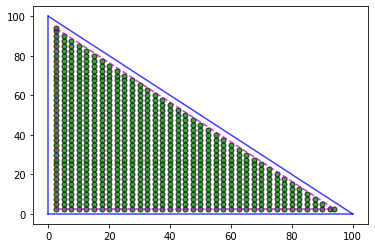

In [452]:
# Visualize
x = store[:,0]
y = store[:,1]
#plt.figure(figsize = (150, 60))
plt.plot((0, 0), (0, y_max), scaley = False,c='blue',alpha = 0.75)
plt.plot((x_max, 0),(0, 0),scaley = False,c='blue',alpha = 0.75)
plt.plot((0, x_max), (y_max, 0), scaley = False,c='blue',alpha = 0.75)

plt.plot((step,(x_max-delta_x)),((y_max-delta_y),step),'m--',label = '2.5 um separation',alpha = 0.75)
plt.plot((step,step),(step,(y_max-delta_y)),'m--',alpha = 0.75)
plt.plot((step,(x_max-delta_x)),(step,step),'m--',alpha = 0.75)

plt.scatter(x,y,s=25,c='green',edgecolor = 'black',alpha = 0.75)

In [453]:
# From p3 to p1 and p2
# Only for Testing

p1 = np.array([0,0])
p2 = np.array([0,y_max])
p3 = np.array([x_max,0])
d = abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
print(d)

100.0


In [454]:
# Function that measures distance from a point p to a line formed by p1 & p2

def dist(p1,p2,p):
    d = abs(np.cross(p2-p1,p-p1)/np.linalg.norm(p2-p1))
    return d

In [455]:
# Function that returns the min distance (from p to 3 lines)
# Returns a value

def min_dist_of_all(p1,p2,p3,p):
    d1 = dist(p1,p2,p)
    d2 = dist(p2,p3,p)
    d3 = dist(p3,p1,p)
    return min(d1,d2,d3)

In [456]:
# Function that returns the max distance (from p to 3 lines)

def max_dist_of_all(p1,p2,p3,p):
    d1 = dist(p1,p2,p)
    d2 = dist(p2,p3,p)
    d3 = dist(p3,p1,p)
    return max(d1,d2,d3)

In [457]:
# Testing a point p(25,10)

p1 = np.array([0,0])
p2 = np.array([0,y_max])
p3 = np.array([x_max,0])
p = np.array([25,10])
print(min_dist_of_all(p1,p2,p3,p))
print(max_dist_of_all(p1,p2,p3,p))

10.0
45.96194077712559


In [458]:
# Calculates min_d, max_d of all points in "store" by traversing all points in numpy array

min_d = []
max_d = []
for i in range(0,len(store)):
    min_d.append(min_dist_of_all(p1,p2,p3,store[i]))
    max_d.append(max_dist_of_all(p1,p2,p3,store[i]))

min_d = np.array(min_d)
max_d = np.array(max_d)

In [459]:
print(min_d)
print(len(min_d))

[ 2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         2.5         2.5         2.5         2.5
  2.5         2.5         5.          5.          5.          5.
  5.          5.          5.          5.          5.          5.
  5.          5.          5.          5.          5.          5.
  5.          5.          5.          5.          5.          5.
  5.          5.          5.          5.          5.          5.
  5.          5.          5.          5.          5.          5.
  3.53553391  2.5         5.          7.5         7.5         7.5
  7.5         7.5         7.5         7.5         7.5         7.5
  7.5         7.5         7.5         7.5         7.5         7.5
  7.5         7.

In [460]:
# Function that calculates probability of each point inside "store" array
# Depending on relative positions
# More probaility nearer the edge

def P_xy(store,min_d,max_d):
    prob = []
    for i in range(0,len(store)):
        if min_d[i] == 2.5:
            prob.append(1)
        else:
            prob.append(1-min_d[i]/max_d[i]*0.99)
            
    return prob

In [461]:
P_xy = np.array(P_xy(store,min_d,max_d))

In [462]:
print(P_xy)
print(len(P_xy))

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.92221825 0.91999592 0.91764286 0.91514719
 0.91249554 0.90967281 0.9066619  0.90344335 0.8999949  0.89629101
 0.8923022  0.88799429 0.88332738 0.87825466 0.87625    0.88352941
 0.89       0.89578947 0.901      0.90571429 0.91       0.91391304
 0.9175     0.9208     0.92384615 0.92666667 0.92928571 0.93172414
 0.934      0.93612903 0.938125   0.94       0.94176471 0.94342857
 0.96110913 1.         0.91999592 0.87646429 0.87272078 0.8687433
 0.86450922 0.85999286 0.85516502 0.84999235 0.84443651 0.8384533
 0.83199143 0.82499107 0.81738199 0.80908117 0.814375   0.82529412
 0.835      0.84368421 0.8515     0.85857143 

In [463]:
# Generates a random Numpy array with floats [0,1]
rand_Gen = []
for i in range(0,len(store)):
    rand_Gen.append(np.random.random())

In [464]:
print(rand_Gen)
print(len(rand_Gen))

[0.7875161077609477, 0.012837642032880181, 0.4689639955391094, 0.47152750419120826, 0.39082783568756263, 0.4548426415419665, 0.9938126612940429, 0.7466661510286525, 0.3773243561768329, 0.8351117081973747, 0.5392528028673457, 0.31479850225183725, 0.4081210174236606, 0.03814168341869972, 0.5626360800457412, 0.7874378145171678, 0.12160189655407871, 0.9227405611682149, 0.25792898093448235, 0.1445830732122746, 0.24833092335296714, 0.10593169417950288, 0.1435841840040677, 0.31393278404295966, 0.39410428863703517, 0.3620933650707012, 0.28879873537211587, 0.4303536348424444, 0.7307095594311186, 0.395482896500849, 0.4366244310617191, 0.4698558020944077, 0.3982714392133484, 0.7267955204192628, 0.43922149398197197, 0.444506460713909, 0.7890477207723454, 0.20479693638600605, 0.16510065686788145, 0.511910013380042, 0.08097674749217543, 0.3867617968612008, 0.7975997960426422, 0.12147717051866291, 0.3429935042175407, 0.3623081779269981, 0.47404492910079854, 0.9420026566153827, 0.1333881663717783, 0.8

In [465]:
# Function that calculates the likelihood of whether a point will exist
# Based on multiplication probability and random factor

def if_exist(P_xy,rand_Gen):
    if_exist = (P_xy>rand_Gen)
    return if_exist

In [466]:
if_exist = np.array(if_exist(P_xy,rand_Gen))

In [467]:
new_store=store[if_exist]

In [468]:
print(new_store)
print(len(new_store))

[[ 2.5         2.5       ]
 [ 2.5         5.        ]
 [ 2.5         7.5       ]
 ...
 [92.5         2.5       ]
 [ 2.5        93.96446609]
 [93.96446609  2.5       ]]
544


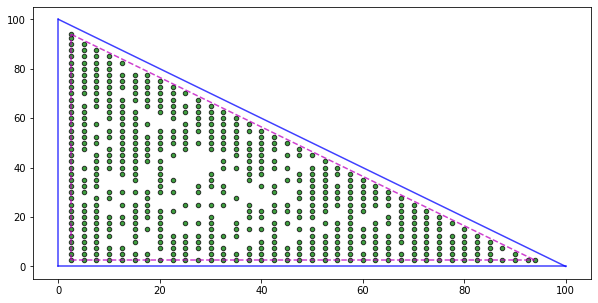

In [469]:
# Visualize
x1 = new_store[:,0]
y1 = new_store[:,1]
#plt.figure(figsize = (150, 60))
plt.figure(figsize=(10,5))
plt.plot((0, 0), (0, y_max), scaley = False,c='blue',alpha = 0.75)
plt.plot((x_max, 0),(0, 0),scaley = False,c='blue',alpha = 0.75)
plt.plot((0, x_max), (y_max, 0), scaley = False,c='blue',alpha = 0.75)

plt.plot((step,(x_max-delta_x)),((y_max-delta_y),step),'m--',label = '2.5 um separation',alpha = 0.75)
plt.plot((step,step),(step,(y_max-delta_y)),'m--',alpha = 0.75)
plt.plot((step,(x_max-delta_x)),(step,step),'m--',alpha = 0.75)

plt.scatter(x1,y1,s=20,c='green',edgecolor = 'black',alpha = 0.75)
